## What is Prouni

The University for All Program, in portuguese, 'Programa Universidade Para Todos (Prouni)' from the brazilian government, according to their website:

"Aims to grant full and partial scholarships for undergraduate courses and specific training in private higher education institutions that offer, in return, tax exemption to those institutions that join the Program.

Aimed at students graduating from public or private high schools (with full scholarship) and with a maximum income per capita inside the family of three minimum wages, Prouni has an automatic and impersonal selection system, which provides transparency and security to the process. The candidates are selected by their scores on the National High School Exam (Exame Nacional do Ensino Médio - Enem), thus combining inclusion with the quality and merit of the students with the best academic performance.' (free translation of https://dados.gov.br/dataset/mec-prouni)

## Dataset

The data is public available at https://dados.gov.br/dataset/mec-prouni. Here I'm using a version already downloaded and  concatenated (each year is a different file) based on columns, found on Kaglle at https://www.kaggle.com/datasets/lfarhat/brasil-students-scholarship-prouni-20052019.

The dataset is between the years 2005 and 2019 and contains the following data:

- ANO_CONCESSAO_BOLSA: year that the scholarship was grant;	
- CODIGO_EMEC_IES_BOLSA: code of the university given by the government;
- NOME_IES_BOLSA: name of the university;
- TIPO_BOLSA: kind of scholarship: 25%, 50%, 100%;
- MODALIDADE_ENSINO_BOLSA: wether the course is in presence or distance;
- NOME_CURSO_BOLSA: name of the course;	
- NOME_TURNO_CURSO_BOLSA: wheter the course is full time, evening, morning, afternoon or distance;	
- CPF_BENEFICIARIO_BOLSA: social security identification;	
- SEXO_BENEFICIARIO_BOLSA: gender;
- RACA_BENEFICIARIO_BOLSA: race;	
- DT_NASCIMENTO_BENEFICIARIO: birthdate;	
- BENEFICIARIO_DEFICIENTE_FISICO: wheter the person is physically disabled;	
- REGIAO_BENEFICIARIO_BOLSA: macro-region;	
- SIGLA_UF_BENEFICIARIO_BOLSA: state;
- MUNICIPIO_BENEFICIARIO_BOLSA: city;	
- idade: age (I delete this entry because it was calculated at the Kaglle version and it's not on the original file)

## Why this analyse

After living in Germany for many years and seeing that public university is accessible to all, I would like to understand what is the profile of the brazilian student who don´t have access to public university and still manage to find a way to study. I would like to understand:
- the evolution of the benefit over the years;
- if there are any universities which grants more scholarships;
- what type of grand is mostly rewarded;
- if there are more presence or distance, and when in presence, what period of the day is mostly used for the studies;
- are there differences between genders and how much;
- what race is mosts receives it;
- what is the average age of the student;
- how many of the students are physically disabled;
- which region/state is most helped by the program;
- Which courses are most looked for;
- can someone be contemplated more than once;
- what is the profile of the students who take the most listed course.

## Data

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import fuzzywuzzy
from fuzzywuzzy import process

C:\Users\Mendes\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
prouni_raw=pd.read_csv('prouni_2005_2019.csv')#,index_col='index')
prouni=prouni_raw.copy()
prouni=prouni.drop(['idade'],axis=1)
prouni.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
0,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Enfermagem,Integral,***264740**,F,Branca,1987-02-17,nao,SUL,RS,santo angelo
1,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***976940**,F,Parda,1986-06-14,nao,SUL,RS,frederico westphalen
2,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Servico Social,Noturno,***045340**,F,Parda,1984-06-03,nao,SUL,RS,frederico westphalen
3,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***988420**,M,Branca,1987-10-19,nao,SUL,RS,frederico westphalen
4,2005,423,UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUA...,BOLSA PARCIAL 50%,PRESENCIAL,Ciencia Da Computacao,Noturno,***378080**,M,Amarela,1987-07-20,nao,SUL,RS,frederico westphalen


In [3]:
prouni.isnull().sum()

ANO_CONCESSAO_BOLSA                  0
CODIGO_EMEC_IES_BOLSA                0
NOME_IES_BOLSA                     489
TIPO_BOLSA                           0
MODALIDADE_ENSINO_BOLSA              0
NOME_CURSO_BOLSA                  5654
NOME_TURNO_CURSO_BOLSA               0
CPF_BENEFICIARIO_BOLSA               0
SEXO_BENEFICIARIO_BOLSA              0
RACA_BENEFICIARIO_BOLSA              0
DT_NASCIMENTO_BENEFICIARIO           0
BENEFICIARIO_DEFICIENTE_FISICO       0
REGIAO_BENEFICIARIO_BOLSA          402
SIGLA_UF_BENEFICIARIO_BOLSA        402
MUNICIPIO_BENEFICIARIO_BOLSA       402
dtype: int64

In [4]:
prouni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692540 entries, 0 to 2692539
Data columns (total 15 columns):
 #   Column                          Dtype 
---  ------                          ----- 
 0   ANO_CONCESSAO_BOLSA             int64 
 1   CODIGO_EMEC_IES_BOLSA           int64 
 2   NOME_IES_BOLSA                  object
 3   TIPO_BOLSA                      object
 4   MODALIDADE_ENSINO_BOLSA         object
 5   NOME_CURSO_BOLSA                object
 6   NOME_TURNO_CURSO_BOLSA          object
 7   CPF_BENEFICIARIO_BOLSA          object
 8   SEXO_BENEFICIARIO_BOLSA         object
 9   RACA_BENEFICIARIO_BOLSA         object
 10  DT_NASCIMENTO_BENEFICIARIO      object
 11  BENEFICIARIO_DEFICIENTE_FISICO  object
 12  REGIAO_BENEFICIARIO_BOLSA       object
 13  SIGLA_UF_BENEFICIARIO_BOLSA     object
 14  MUNICIPIO_BENEFICIARIO_BOLSA    object
dtypes: int64(2), object(13)
memory usage: 308.1+ MB


There is a total of 2.692.540 scholarships given between 2005 and 2019. From all the data, 402 entries miss the location, 5654 miss the name of the course and 489 miss the name of the university.

### Year

In [5]:
year=prouni.ANO_CONCESSAO_BOLSA.value_counts().sort_index()
year

2005     95629
2006    109025
2007    105574
2008    124621
2009    161369
2010    152733
2011    170766
2012    176764
2013    177326
2014    223598
2015    252650
2016    239262
2017    236636
2018    241032
2019    225555
Name: ANO_CONCESSAO_BOLSA, dtype: int64

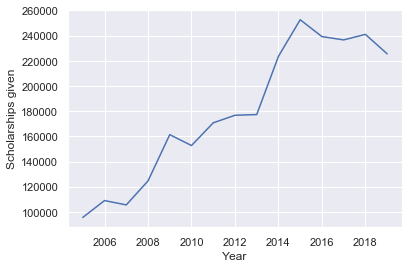

In [6]:
plt.plot(year)
plt.xlabel('Year')
plt.ylabel('Scholarships given')
plt.show()

From the plot above is possible to see that on the first year of the program, almost 100.000 scholarships were granted. This amount increases reaching a maximum of 252.650 in 2015 and started decreasing in the following years.

### Can someone be contemplated twice?

For this check, I'll have a look on the social security identification number together with the birthdate.

In [7]:
prouni.CPF_BENEFICIARIO_BOLSA.value_counts()

***546888**      21
***205328**      20
***724978**      20
***308058**      20
***849858**      20
                 ..
***696900**       1
***08394350**     1
***91846840**     1
***38158925**     1
***93368002**     1
Name: CPF_BENEFICIARIO_BOLSA, Length: 1316468, dtype: int64

In [8]:
data_1=prouni[prouni['CPF_BENEFICIARIO_BOLSA']=='***546888**']

In [9]:
data_1.DT_NASCIMENTO_BENEFICIARIO.value_counts()

1976-06-15    6
1990-03-29    3
1994-06-29    2
1988-06-16    2
1975-06-24    1
1978-02-16    1
1984-03-04    1
1991-06-27    1
1987-01-31    1
1989-06-11    1
1988-01-29    1
1982-04-09    1
Name: DT_NASCIMENTO_BENEFICIARIO, dtype: int64

In [10]:
data_2=data_1[data_1['DT_NASCIMENTO_BENEFICIARIO']=='1976-06-15']
data_2

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
459997,2009,1491,CENTRO UNIVERSITARIO INTERNACIONAL,BOLSA PARCIAL 50%,EAD,Gestao Financeira,A Distancia,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba
648826,2010,1872,FACULDADES INTEGRADAS SANTA CRUZ DE CURITIBA,BOLSA PARCIAL 50%,PRESENCIAL,Direito,Matutino,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba
670008,2010,1487,FACULDADE DOM BOSCO,BOLSA INTEGRAL,PRESENCIAL,Direito,Matutino,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba
1556241,2015,197,FACULDADE DE EDUCACAO SUPERIOR DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Matutino,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba
1679124,2015,5288,FACULDADE ANHANGUERA DE RIBEIRAO PRETO,BOLSA INTEGRAL,PRESENCIAL,Engenharia Mecanica,Noturno,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba
1940783,2016,1270,CENTRO UNIVERSITARIO ESTACIO DE RIBEIRAO PRETO,BOLSA INTEGRAL,PRESENCIAL,Direito,Noturno,***546888**,M,Branca,1976-06-15,nao,SUL,PR,curitiba


In [11]:
data_3=data_1[data_1['DT_NASCIMENTO_BENEFICIARIO']=='1990-03-29']
data_3

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA
754679,2011,375,UNIVERSIDADE DE SANTO AMARO,BOLSA PARCIAL 50%,PRESENCIAL,Engenharia Ambiental,Noturno,***546888**,M,Parda,1990-03-29,nao,SUDESTE,SP,sao paulo
1103315,2013,375,UNIVERSIDADE DE SANTO AMARO,BOLSA INTEGRAL,PRESENCIAL,Engenharia Ambiental,Noturno,***546888**,M,Parda,1990-03-29,nao,SUDESTE,SP,sao paulo
1593718,2015,3985,CENTRO UNIVERSITARIO SENAC,BOLSA INTEGRAL,PRESENCIAL,Engenharia Ambiental E Sanitaria,Noturno,***546888**,M,Parda,1990-03-29,nao,SUDESTE,SP,sao paulo


It seems like it is possible to be contemplated twice. As we only have part of the social security number, for one of the numbers we found 21 cases where they had the same numbers inside it. From those, 6 of them had the same birth date. Although they are all men, white, no disability, from the same city, they had different courses in different universities. For this reason, for this case, we can't claim they are the same person. In this same social number, looking at the second birth date, it seems like the same men went from a partial scholarship in 2011 (50%) to full scholarship in 2013. So this answers the question that yes, it is possible to be contemplated twice, but as our data is limited, we cannot tell how many of them have gotten them more than once.

### Universities

In [12]:
prouni.CODIGO_EMEC_IES_BOLSA.value_counts()

322      155486
298      111550
671       63237
1491      60478
163       56429
          ...  
1293          1
19787         1
19255         1
2514          1
1301          1
Name: CODIGO_EMEC_IES_BOLSA, Length: 2147, dtype: int64

In [13]:
prouni.NOME_IES_BOLSA.value_counts()

UNIVERSIDADE PAULISTA                                155486
UNIVERSIDADE PITAGORAS UNOPAR                        111550
CENTRO UNIVERSITARIO INTERNACIONAL                    60478
UNIVERSIDADE ESTACIO DE SA                            56429
UNIVERSIDADE ANHANGUERA - UNIDERP                     49300
                                                      ...  
Faculdade Presidente Antonio Carlos de Carmopolis         1
FACULDADE PITAGORAS DE BOM JESUS DA LAPA                  1
FACULDADE PITAGORAS DE TUCURUA                            1
FACULDADE METROPOLITANA DE ITAJAA                         1
FACULDADE DE TECNOLOGIA FRANCISCO MORATO                  1
Name: NOME_IES_BOLSA, Length: 2767, dtype: int64

In [14]:
la=prouni[prouni['CODIGO_EMEC_IES_BOLSA']==671]

In [15]:
la.NOME_IES_BOLSA

2044       UNIVERSIDADE ANHANGUERA - UNIDERP
2045       UNIVERSIDADE ANHANGUERA - UNIDERP
2565       UNIVERSIDADE ANHANGUERA - UNIDERP
2566       UNIVERSIDADE ANHANGUERA - UNIDERP
2597       UNIVERSIDADE ANHANGUERA - UNIDERP
                         ...                
2672388              UNIVERSIDADE ANHANGUERA
2672389              UNIVERSIDADE ANHANGUERA
2672390              UNIVERSIDADE ANHANGUERA
2672391              UNIVERSIDADE ANHANGUERA
2672392              UNIVERSIDADE ANHANGUERA
Name: NOME_IES_BOLSA, Length: 63237, dtype: object

In [16]:
percent_uni=(prouni.CODIGO_EMEC_IES_BOLSA.value_counts()/len(prouni))*100
sum(percent_uni.head(10))

24.292563898772162

Looking at the code and the name of the universities, one sees that there are less codes than names. Looking at the code 671 for example, which was counted 63.237 times but doesn´t show in the names. Looking at the names inside this code, it's easy to understand - some people put just the name "UNIVERSIDADE ANHANGUERA" and some people put the name of the university plus the campus "UNIVERSIDADE ANHANGUERA - UNIDERP", therefore the difference. So we consider here the generic name, and that there are 2.147 universities granting scholarships through the program.

From all the dataset, almost 6% of the grants where given to UNIVERSIDADE PAULISTA, 4% to UNIVERSIDADE PITAGORAS UNOPAR and 2.3% to UNIVERSIDADE ANHANGUERA. 654.087 scholarship grants were given by only 10 universities among 2.147, which represents 24% of all the scholarships!

### Type of scholarship

In [17]:
sum_type=prouni.TIPO_BOLSA.value_counts()
sum_type

BOLSA INTEGRAL            1876706
BOLSA PARCIAL 50%          813504
BOLSA COMPLEMENTAR 25%       2330
Name: TIPO_BOLSA, dtype: int64

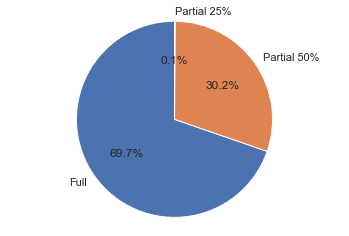

In [18]:
fig1,ax1=plt.subplots()
ax1.pie(sum_type,labels=['Full','Partial 50%','Partial 25%'],autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

In [19]:
data_4=prouni[prouni['TIPO_BOLSA']=='BOLSA COMPLEMENTAR 25%']

In [20]:
data_4.ANO_CONCESSAO_BOLSA.unique()

array([2008], dtype=int64)

From the piechart, almost 70% are full scholarships, while 30% are 50% scholarships. It seems like 25% were only given in the year of 2008.

### Modality

In [21]:
sum_mod=prouni['MODALIDADE_ENSINO_BOLSA'].value_counts()
sum_mod

PRESENCIAL    2192014
EAD            500526
Name: MODALIDADE_ENSINO_BOLSA, dtype: int64

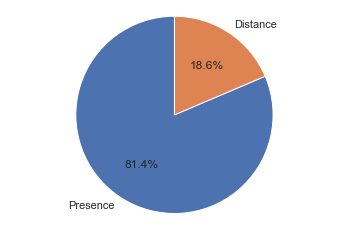

In [22]:
fig1,ax1=plt.subplots()
ax1.pie(sum_mod,labels=['Presence','Distance'],autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

81.4% of the students are taking presential courses while 18.6% distance courses.

### Shift

In [23]:
sum_shift=prouni['NOME_TURNO_CURSO_BOLSA'].value_counts()
sum_shift=sum_shift.drop(labels = ['A Distancia']) 
sum_shift=sum_shift/sum(sum_shift)*100
sum_shift

Noturno       70.739877
Matutino      22.346299
Integral       3.588161
Vespertino     3.325663
Name: NOME_TURNO_CURSO_BOLSA, dtype: float64

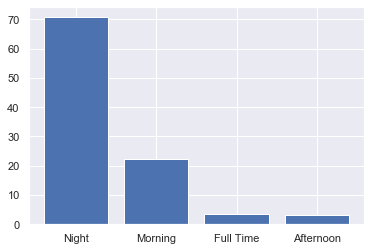

In [24]:
fig1,ax1=plt.subplots()
ax1.bar(['Night','Morning','Full Time','Afternoon'],sum_shift)
plt.show()

From all the presential courses, 70% are on night school, 22% morning school and 6% between afternoon and full time school. In Brazil is normal that people will work along the day and attend school at night.

### Gender

In [25]:
sum_gender=prouni['SEXO_BENEFICIARIO_BOLSA'].value_counts()
sum_gender=sum_gender/sum(sum_gender)*100
sum_gender

F    54.178099
M    45.821901
Name: SEXO_BENEFICIARIO_BOLSA, dtype: float64

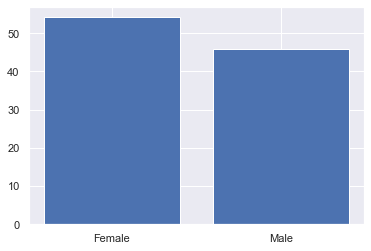

In [26]:
fig1,ax1=plt.subplots()
ax1.bar(['Female','Male'],sum_gender)
plt.show()

54% of the scholarship holders are woman while 46% are men.

### Race

In [27]:
sum_race=prouni['RACA_BENEFICIARIO_BOLSA'].value_counts()
sum_race=sum_race/sum(sum_race)*100
sum_race

Branca           43.191113
Parda            41.373573
Preta            12.695485
Amarela           1.754997
Nao Informada     0.877944
Indigena          0.106888
Name: RACA_BENEFICIARIO_BOLSA, dtype: float64

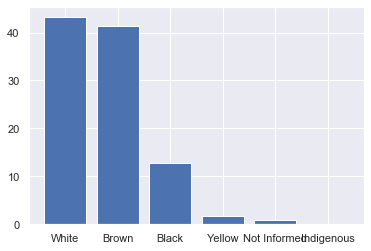

In [28]:
fig1,ax1=plt.subplots()
ax1.bar(['White','Brown','Black','Yellow','Not Informed','Indigenous'],sum_race)
plt.show()

43% of the students consider themselves white, 41% brown and 13% black. Yellow and indigenous sum less than 2% and less than 1% did not inform their race.

### Age

In [29]:
prouni.DT_NASCIMENTO_BENEFICIARIO

0          1987-02-17
1          1986-06-14
2          1984-06-03
3          1987-10-19
4          1987-07-20
              ...    
2692535    2001-04-05
2692536    2001-06-16
2692537    1992-12-13
2692538    1996-12-27
2692539    1985-03-14
Name: DT_NASCIMENTO_BENEFICIARIO, Length: 2692540, dtype: object

In [30]:
prouni['DT_NASCIMENTO_BENEFICIARIO']=pd.to_datetime(prouni['DT_NASCIMENTO_BENEFICIARIO'])

In [31]:
prouni['birth_year'] = prouni['DT_NASCIMENTO_BENEFICIARIO'].dt.year

In [32]:
prouni['age']=prouni['ANO_CONCESSAO_BOLSA']-prouni['birth_year']

In [33]:
prouni['age']

0          18
1          19
2          21
3          18
4          18
           ..
2692535    18
2692536    18
2692537    27
2692538    23
2692539    34
Name: age, Length: 2692540, dtype: int64

Text(0, 0.5, 'Count')

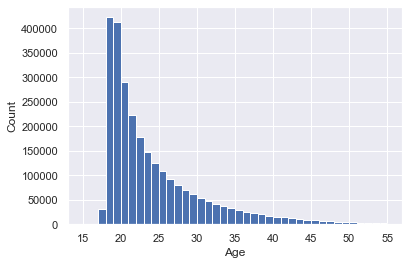

In [34]:
plt.hist(prouni['age'],range=[15,55],bins=55-15)
plt.xlabel('Age')
plt.ylabel('Count')

In [35]:
idade=prouni['age'].value_counts()
idade.head(10)

18    422808
19    413752
20    290098
21    223577
22    178467
23    147810
24    125991
25    108314
26     93434
27     81205
Name: age, dtype: int64

In [36]:
sum(idade.head(10))/len(prouni['age'])

0.7745311118869171

Students enter the program with ages varying from 17 to 51 years old. 31% of them start university with 18 to 19 years old, and 77% of them start between 18 and 27 years old.

### Physically disabled

In [37]:
prouni['BENEFICIARIO_DEFICIENTE_FISICO'].value_counts()

nao    2673367
sim      19173
Name: BENEFICIARIO_DEFICIENTE_FISICO, dtype: int64

In [38]:
19173/len(prouni)*100

0.7120785577930133

0.7% of the students are physically disabled.

### Region

In [39]:
reg=prouni['REGIAO_BENEFICIARIO_BOLSA'].value_counts()
reg

SUDESTE         1289321
SUL              491560
NORDESTE         486819
CENTRO-OESTE     247089
NORTE            177349
Name: REGIAO_BENEFICIARIO_BOLSA, dtype: int64

In [40]:
reg/sum(reg)*100

SUDESTE         47.892084
SUL             18.259094
NORDESTE        18.082988
CENTRO-OESTE     9.178170
NORTE            6.587664
Name: REGIAO_BENEFICIARIO_BOLSA, dtype: float64

In [41]:
data=[['Southeast', 89632912], ['South', 30402587], ['Northeast', 57667842], ['Center-West', 16707336],['North', 18906962]]
region=pd.DataFrame(data, columns=['Region', 'Population'])
region

,Region,Population
0,Southeast,89632912
1,South,30402587
2,Northeast,57667842
3,Center-West,16707336
4,North,18906962


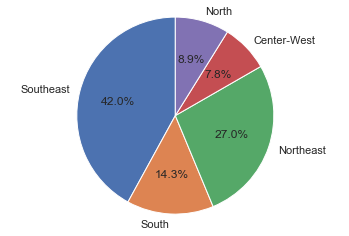

In [42]:
fig1,ax1=plt.subplots()
ax1.pie(region['Population'],labels=region['Region'],autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

In [43]:
for i in range (5):
 print(region['Region'][i],reg[i]/region['Population'][i]*100)

Southeast 1.4384459583328053
South 1.6168360935863781
Northeast 0.8441775920798286
Center-West 1.4789251859183294
North 0.9380089725678827


The pie chart above, shows the expected population in each region in Brazil in 2021, according to the Demographic Census
 of the Brazilian Institute of Geography and Statistics. As seem, 42% of the population live in the Southeast, 27% in the Northeast, 14.3% in the South, 8.9% in the North and 7.8% in the Center-West. Although the Northeast has the second biggest amount of people, it receives the lowest amount of scholarship per person. Southeast is the region with more people and also the one receiving more scholarships, 48% of them goes into this region. The North area receives the least, only 6.6% of scholarships.

In [44]:
prouni['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts()/sum(prouni['SIGLA_UF_BENEFICIARIO_BOLSA'].value_counts())*100

SP    28.281425
MG    12.143657
RS     7.684822
PR     7.284099
BA     5.877039
RJ     5.658662
GO     3.372004
SC     3.290173
PE     2.742579
DF     2.696110
MA     2.461129
CE     2.430522
PA     2.245502
ES     1.808340
AM     1.669194
MT     1.556607
MS     1.553449
RN     1.252127
RO     1.156627
PB     1.054478
PI     0.918935
SE     0.773512
AL     0.572668
TO     0.535485
AC     0.419444
AP     0.355145
RR     0.206267
Name: SIGLA_UF_BENEFICIARIO_BOLSA, dtype: float64

The state of São Paulo gets 28% of the scholarships, followed by Minas Gerais with 12%. Both are in the Southeast region. The next states are Rio Grande do Sul and Paraná, with 8% and 7% respectivelly, and both countries are in the South region. The 4 first states already explain 55% of the scholarships and the other states in this regions don´t get as much scholarships as this ones.

In [45]:
prouni['MUNICIPIO_BENEFICIARIO_BOLSA'].value_counts()

sao paulo            219247
brasilia              72583
belo horizonte        67982
rio de janeiro        66984
curitiba              60692
                      ...  
pindoba                   1
vila alta                 1
caraubas do piaui         1
uiramuta                  1
joao costa                1
Name: MUNICIPIO_BENEFICIARIO_BOLSA, Length: 5318, dtype: int64

In [46]:
print("São Paulo",219247/1289321*100)
print("Brasiília",72583/247089*100)
print("BH",67982/1289321*100)
print("Rio",66984/1289321*100)
print("Curitiba",60692/491560*100)

São Paulo 17.0048420835463
Brasiília 29.375245356936162
BH 5.272697799849689
Rio 5.195292716088546
Curitiba 12.346814224102856


Another interesting fact here is that Brasília holds the second place per city. Located in the the Center-West, just this one city has 29% of the scholarships in the whole region. São Paulo, the city who holds most scholarships, represents 17% of its region.

### Course

In [52]:
print('There are ', len(prouni['NOME_CURSO_BOLSA'].unique()),' differente courses listed')
prouni['NOME_CURSO_BOLSA'] = prouni['NOME_CURSO_BOLSA'].str.split('-').str[0]
prouni['NOME_CURSO_BOLSA'] = prouni['NOME_CURSO_BOLSA'].str.split('(').str[0]
print('There are ', len(prouni['NOME_CURSO_BOLSA'].unique()),' differente courses listed')

There are  2265  differente courses listed
There are  2265  differente courses listed


In [53]:
top_courses=prouni['NOME_CURSO_BOLSA'].value_counts()
top_courses[:20]

Administracao                 274695
Direito                       225574
Pedagogia                     200942
Ciencias Contabeis            105991
Enfermagem                     99764
Engenharia Civil               72551
Psicologia                     69730
Educacao Fisica                61579
Gestao De Recursos Humanos     57878
Fisioterapia                   56671
AdministraAAo                  53693
Letras                         45632
Servico Social                 41950
Arquitetura E Urbanismo        39980
Engenharia De Producao         34351
CiAancias ContAbeis            32724
Logistica                      32295
Marketing                      30570
Farmacia                       30370
Processos Gerenciais           29665
Name: NOME_CURSO_BOLSA, dtype: int64

In [54]:
# function to replace rows in the provided column of the provided dataframe
# that match the provided string above the provided ratio with the provided string
def replace_matches_in_column(df, column, string_to_match, min_ratio):
    # get a list of unique strings
    strings = df[column].unique()
    
    # get the top 10 closest matches to our input string
    matches = fuzzywuzzy.process.extract(string_to_match, strings, 
                                         limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)

    # only get matches with a ratio > 90
    close_matches = [matches[0] for matches in matches if matches[1] >= min_ratio]

    # get the rows of all the close matches in our dataframe
    rows_with_matches = df[column].isin(close_matches)

    # replace all rows with close matches with the input matches 
    df.loc[rows_with_matches, column] = string_to_match
    
    # let us know the function's done
    print("All done!")

In [64]:
courses=prouni['NOME_CURSO_BOLSA'].unique()
#courses

In [65]:
matches = fuzzywuzzy.process.extract('Administracao', courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Administracao', 100),
 ('Administracao ', 100),
 ('AdministraAAo', 92),
 ('AdministraAAo ', 92),
 ('AdministraAao', 92),
 ('AdminstraAAo', 88),
 ('AdmistraAAo', 83),
 ('Administracao Rural', 81),
 ('AdministraAAo Ead', 80),
 ('Administracao Publica', 76),
 ('Mineracao', 73),
 ('Administracao Ambiental', 72),
 ('Gestao Administrativa', 71),
 ('Administracao Hospitalar', 70),
 ('Administracao Em Turismo', 70),
 ('AdministraAAo PAoblica', 69),
 ('Administracao De Empresas', 68),
 ('Administracao De Empresas ', 68),
 ('Administracao Legislativa', 68),
 ('Administracao Em Marketing', 67),
 ('AdministraAAo De Empresas ', 63),
 ('AdministraAAo De Empresas', 63),
 ('AdministraAAo A DistAncia', 63),
 ('Gestao Em Administracao Publica', 59),
 ('Nutricao', 57),
 ('Administracao De Recursos Humanos', 57),
 ('Nutricao ', 57),
 ('Automobilistica', 57),
 ('NutriAAo', 57),
 ('NutriAAo ', 57)]

In [66]:
# use the function we just wrote to replace close matches 
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Administracao", min_ratio = 83)

All done!


In [67]:
top_courses=prouni['NOME_CURSO_BOLSA'].value_counts()
top_courses[:20]

Administracao                 334954
Direito                       225574
Pedagogia                     200942
Ciencias Contabeis            105991
Enfermagem                     99764
Engenharia Civil               72551
Psicologia                     69730
Educacao Fisica                61579
Gestao De Recursos Humanos     57878
Fisioterapia                   56671
Letras                         45632
Servico Social                 41950
Arquitetura E Urbanismo        39980
Engenharia De Producao         34351
CiAancias ContAbeis            32724
Logistica                      32295
Marketing                      30570
Farmacia                       30370
Processos Gerenciais           29665
Comunicacao Social             28622
Name: NOME_CURSO_BOLSA, dtype: int64

In [68]:
matches = fuzzywuzzy.process.extract("Ciencias Contabeis", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Ciencias Contabeis', 100),
 ('Ciencias Contabeis ', 100),
 ('Ciencias ContAbeis', 100),
 ('CiAancias ContAbeis', 92),
 ('CiAancias ContAbeis ', 92),
 ('CiAancias Contabeis', 92),
 ('CiAacias ContAbeis', 89),
 ('CiAancias ContabAis ', 86),
 ('CiAancias ContAbeis Ead', 83),
 ('Ciencias Naturais ', 80),
 ('Ciencias Economicas', 76),
 ('Ciencias Sociais', 76),
 ('Ciencias Economicas ', 76),
 ('CiAancias EconA micas', 72),
 ('CiAancias EconA micas ', 72),
 ('Ciencias Equinas', 71),
 ('CiAancias ContAbeis E Tributos', 71),
 ('Ciencia Economica', 69),
 ('CiAancias Sociais', 69),
 ('CiAancias ContAbeis A DistAncia', 69),
 ('CiAancias Sociais ', 69),
 ('Ciencias Politicas', 67),
 ('Ciencias Estatisticas', 67),
 ('Ciencias Da Computacao', 65),
 ('Ciencias Farmaceuticas', 65),
 ('Ciencias Teologicas', 65),
 ('CiAancia EconA mica', 65),
 ('CiAancias Gerenciais', 63),
 ('Ciencia Da Computacao', 62),
 ('Ciencias', 62)]

In [69]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Ciencias Contabeis", min_ratio = 83)

All done!


In [70]:
top_courses=prouni['NOME_CURSO_BOLSA'].value_counts()
top_courses[:20]

Administracao                 334954
Direito                       225574
Pedagogia                     200942
Ciencias Contabeis            141552
Enfermagem                     99764
Engenharia Civil               72551
Psicologia                     69730
Educacao Fisica                61579
Gestao De Recursos Humanos     57878
Fisioterapia                   56671
Letras                         45632
Servico Social                 41950
Arquitetura E Urbanismo        39980
Engenharia De Producao         34351
Logistica                      32295
Marketing                      30570
Farmacia                       30370
Processos Gerenciais           29665
Comunicacao Social             28622
EducaAAo FAsica                26861
Name: NOME_CURSO_BOLSA, dtype: int64

In [71]:
matches = fuzzywuzzy.process.extract("Educacao Fisica", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Educacao Fisica', 100),
 ('Educacao Fisica ', 100),
 ('EducaAAo Fisica', 93),
 ('EducaAao FAsica', 87),
 ('EducaAAo FAsica', 87),
 ('EducaAAo FAsica ', 87),
 ('EducaAAo  FAsica', 87),
 ('EducaAAo FAsica  ', 87),
 ('EducaAAo FisAca', 87),
 ('EducaAAo FAsica/B ', 81),
 ('EducaAAo FAsica/L ', 81),
 ('Educacao Fisica E Desportos ', 71),
 ('Bacharelado Em Educacao Fisica', 67),
 ('EducaAAo FAsica E Esporte', 65),
 ('Comunicacao Juridica', 63),
 ('EducaAAo FAsica E Esportes', 63),
 ('EducaAAo Especial', 62),
 ('Comunicacao Institucional', 60),
 ('Comunicacao Digital', 59),
 ('Comunicacao Digital ', 59),
 ('Decoracao & Design', 58),
 ('Automacao Industrial', 57),
 ('Fisica', 57),
 ('Fisica ', 57),
 ('Arte Educacao', 57),
 ('Licenciatura Em EducaAAo FAsica', 57),
 ('Filosofia Ead', 57),
 ('Comunicacao Social', 55),
 ('Comunicacao Social ', 55),
 ('Comunicacao Social  ', 55)]

In [72]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Educacao Fisica", min_ratio = 65)

All done!


In [89]:
matches = fuzzywuzzy.process.extract("Gestao De Recursos Humanos", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Gestao De Recursos Humanos', 100),
 ('GestAo De Recursos Humanos', 100),
 ('GestAo De Recursos Humanos ', 100),
 ('Gestao Em Recursos Humanos', 96),
 ('Gestao De Recursos Hidricos', 83),
 ('Gestao De Relacoes Humanas', 81),
 ('Recursos Humanos Estrategicos', 80),
 ('Desenvolvimento De Recursos Humanos', 79),
 ('Tecnologia Em GestAo De Recursos Humanos', 79),
 ('Gestao E Planejamento De Recursos Humanos', 78),
 ('Recursos Humanos', 76),
 ('Gestao De Negocios Securitarios', 70),
 ('Superior De Tecnologia GestAo De Recursos Humanos', 69),
 ('Gestao De Servicos Publicos', 68),
 ('Gestao De Orgaos Publicos', 67),
 ('Gestao De Varejo', 67),
 ('Gestao De Negocios Imobiliarios', 67),
 ('GestAo De Varejo', 67),
 ('Superior De Tecnologia Em GestAo De Recursos Humanos', 67),
 ('GestAo De ServiAos JurAdicos', 67),
 ('GestAo De NegA3cios ImobiliArios', 66),
 ('Gestao De Turismo', 65),
 ('Gestao De Pessoas', 65),
 ('Gestao De Negocios Em Turismo', 65),
 ('Gestao De Marketing No Varejo', 65),
 ('G

In [90]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Gestao De Recursos Humanos", min_ratio = 95)

All done!


In [92]:
matches = fuzzywuzzy.process.extract("Farmacia", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Farmacia', 100),
 ('FarmAcia', 100),
 ('FarmAcia ', 100),
 ('Informatica', 63),
 ('Informatica  ', 63),
 ('InformAtica', 63),
 ('InformAtica ', 63),
 ('Paramedicina', 60),
 ('Agronomia', 59),
 ('Farmacia Bioquimica ', 59),
 ('Agronomia ', 59),
 ('FarmAcia Industrial', 59),
 ('FAsica MAdica', 57),
 ('FAsica MAdica **', 57),
 ('Farmacia E Bioquimica ', 55),
 ('Farmacia E Bioquimica', 55),
 ('FarmAcia E BioquAmica', 55),
 ('FarmAcia E BioquAmica ', 55),
 ('Gastronomia', 53),
 ('Arteterapia', 53),
 ('Ciencias Farmaceuticas', 53),
 ('Gastronomia ', 53),
 ('MAosica', 53),
 ('MAosica ', 53),
 ('Fabricacao Mecanica', 52),
 ('FabricaAAo MecAnica', 52),
 ('Medicina', 50),
 ('Artes Dramaticas', 50),
 ('Medicina ', 50),
 ('CiAancias FarmacAauticas', 50)]

In [93]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Farmacia", min_ratio = 95)

All done!


In [95]:
matches = fuzzywuzzy.process.extract("Nutricao", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Nutricao', 100),
 ('Nutricao ', 100),
 ('NutriAAo', 88),
 ('NutriAAo ', 88),
 ('NutriAao', 88),
 ('Mineracao', 59),
 ('Administracao', 57),
 ('Administracao ', 57),
 ('Musica', 57),
 ('Musica ', 57),
 ('Agroindustria', 57),
 ('Computacao', 56),
 ('Eletronica', 56),
 ('Quimica Industrial', 54),
 ('QuAmica Industrial', 54),
 ('Quimica', 53),
 ('Turismo', 53),
 ('Informatica', 53),
 ('Naturologia', 53),
 ('Turismo ', 53),
 ('Mecatronica Industrial', 53),
 ('Informatica  ', 53),
 ('Quimica ', 53),
 ('QuAmica', 53),
 ('InformAtica', 53),
 ('InformAtica ', 53),
 ('Turismo  ', 53),
 ('QuAmica ', 53),
 ('Historia', 50),
 ('Secretariado', 50)]

In [96]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Nutricao", min_ratio = 88)

All done!


In [98]:
matches = fuzzywuzzy.process.extract("Servico Social", courses, limit=30, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
matches

[('Servico Social', 100),
 ('ServiAo Social', 93),
 ('ServiAo Social ', 93),
 ('Ecologia Social', 69),
 ('ServiAo Social E Cidadania', 65),
 ('Comunicacao Social', 62),
 ('Comunicacao Social ', 62),
 ('Comunicacao Social  ', 62),
 ('ComunicaAAo Social', 62),
 ('ComunicaAAo Social ', 62),
 ('ComunicaAao Social', 62),
 ('ComunicacAo Social', 62),
 ('ComunicaAAo Social  ', 62),
 ('Educador Social', 62),
 ('Aviacao Civil', 59),
 ('Psicologia', 58),
 ('Psicologia ', 58),
 ('EducaAAo Especial', 58),
 ('Sistemas Eletricos', 56),
 ('Sistemas ElAtricos', 56),
 ('Ecologia', 55),
 ('Estudos Sociais', 55),
 ('Estudos Sociais ', 55),
 ('Economia', 55),
 ('Servicos Penais', 55),
 ('Economia ', 55),
 ('Psicomotricidade', 53),
 ('Filosofia', 52),
 ('Ciencias Juridicas E Sociais ', 52),
 ('Filosofia ', 52)]

In [99]:
replace_matches_in_column(df=prouni, column='NOME_CURSO_BOLSA', string_to_match="Servico Social", min_ratio = 93)

All done!


In [100]:
top_courses=prouni['NOME_CURSO_BOLSA'].value_counts()
top_courses[:40]

Administracao                            334954
Direito                                  225574
Pedagogia                                200942
Ciencias Contabeis                       141552
Enfermagem                                99764
Educacao Fisica                           96884
Gestao De Recursos Humanos                75578
Engenharia Civil                          72551
Psicologia                                69730
Fisioterapia                              56671
Servico Social                            54582
Letras                                    45632
Farmacia                                  43056
Arquitetura E Urbanismo                   39980
Nutricao                                  38106
Engenharia De Producao                    34351
Logistica                                 32295
Marketing                                 30570
Processos Gerenciais                      29665
Comunicacao Social                        28622
Sistemas De Informacao                  

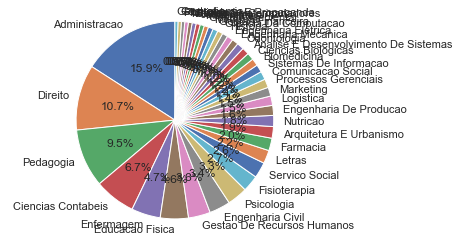

In [102]:
fig1,ax1=plt.subplots()
ax1.pie(top_courses[:40],labels=top_courses.index[:40],autopct='%1.1f%%',startangle=90)
ax1.axis('equal')
plt.show()

In [103]:
top_sum2=top_courses.cumsum()/top_courses.sum()*100
len(top_courses)

2226

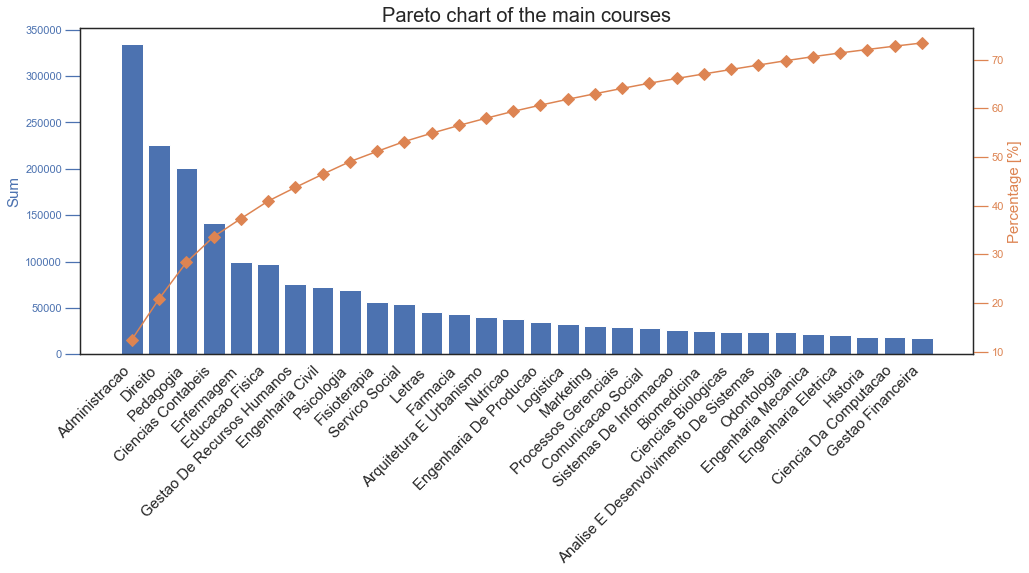

In [104]:
n=30
fig, ax = plt.subplots(figsize=(16,6))
ax.bar(top_courses.index[:n],top_courses[:n], color="C0")
ax2 = ax.twinx()
ax2.plot(top_courses.index[:n],top_sum2[:n], color="C1", marker="D", ms=9)
ax.set_xticklabels(top_courses.index[:n], rotation=45, ha='right', size=15)
ax.set_title('Pareto chart of the main courses', size=20)
ax.set_ylabel('Sum', color="C0", size=15)
ax2.set_ylabel('Percentage [%]', color="C1", size=15)
#ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0", size=15)
ax2.tick_params(axis="y", colors="C1", size=15)
sns.set_style("white")
plt.show()

In [105]:
top_sum2[30]

74.0637674988816

The courses most looked for are Management, Law, Teaching, Accounting and Nursing. The exactly amount is hard to tell, because in each school they use a different name for the same course and therefore there are 2226 different courses listed, after a deep cleaning in the data. Still, 30 of the most looked courses already represent than 74% of all courses listed. 

### Profile of the student attending the top course

In [112]:
manag_student = prouni.loc[prouni.NOME_CURSO_BOLSA.isin(['Administracao'])]
manag_student=manag_student.reset_index(drop=True)
manag_student.head()

,ANO_CONCESSAO_BOLSA,CODIGO_EMEC_IES_BOLSA,NOME_IES_BOLSA,TIPO_BOLSA,MODALIDADE_ENSINO_BOLSA,NOME_CURSO_BOLSA,NOME_TURNO_CURSO_BOLSA,CPF_BENEFICIARIO_BOLSA,SEXO_BENEFICIARIO_BOLSA,RACA_BENEFICIARIO_BOLSA,DT_NASCIMENTO_BENEFICIARIO,BENEFICIARIO_DEFICIENTE_FISICO,REGIAO_BENEFICIARIO_BOLSA,SIGLA_UF_BENEFICIARIO_BOLSA,MUNICIPIO_BENEFICIARIO_BOLSA,birth_year,age
0,2005,10,PONTIFICIA UNIVERSIDADE CATOLICA DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***209879**,M,Parda,1985-02-13,nao,SUL,PR,sao jose dos pinhais,1985,20
1,2005,10,PONTIFICIA UNIVERSIDADE CATOLICA DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***083259**,F,Branca,1987-07-20,nao,SUL,PR,sao jose dos pinhais,1987,18
2,2005,10,PONTIFICIA UNIVERSIDADE CATOLICA DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***529669**,F,Amarela,1987-09-06,nao,SUL,PR,sao jose dos pinhais,1987,18
3,2005,10,PONTIFICIA UNIVERSIDADE CATOLICA DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***869569**,F,Parda,1987-12-27,nao,SUL,PR,sao jose dos pinhais,1987,18
4,2005,10,PONTIFICIA UNIVERSIDADE CATOLICA DO PARANA,BOLSA INTEGRAL,PRESENCIAL,Administracao,Noturno,***866769**,M,Branca,1987-04-04,nao,SUL,PR,sao jose dos pinhais,1987,18


In [163]:
sum_shift=manag_student['NOME_TURNO_CURSO_BOLSA'].value_counts()
sum_shift=sum_shift.drop(labels = ['A Distancia']) 
sum_shift=sum_shift/sum(sum_shift)*100
sum_shift

Noturno       81.600718
Matutino      17.019120
Vespertino     1.117095
Integral       0.263068
Name: NOME_TURNO_CURSO_BOLSA, dtype: float64

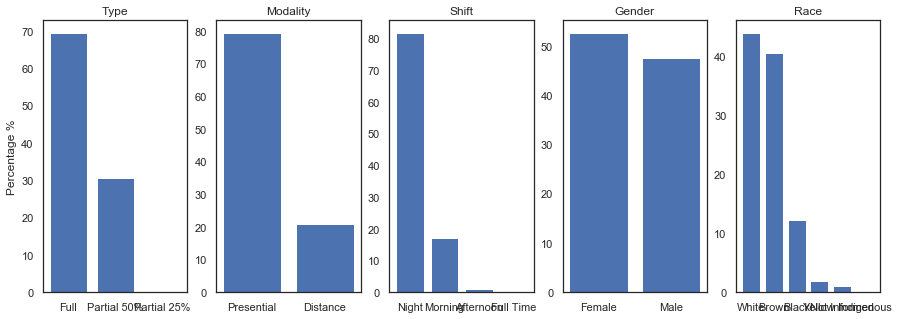

In [166]:
fig,(ax1, ax2,ax3,ax4,ax5)=plt.subplots(1,5,figsize=(15,5))

#type

ax1.bar(['Full','Partial 50%','Partial 25%'],manag_student['TIPO_BOLSA'].value_counts()/sum(manag_student['TIPO_BOLSA'].value_counts())*100)
ax1.set_title('Type')
ax1.set_ylabel('Percentage %')


#presence or distance
ax2.bar(['Presential','Distance'],manag_student['MODALIDADE_ENSINO_BOLSA'].value_counts()/sum(manag_student['MODALIDADE_ENSINO_BOLSA'].value_counts())*100)
ax2.set_title('Modality')

#shift
ax3.bar(['Night','Morning','Afternoon','Full Time'],sum_shift)
ax3.set_title('Shift')


#gender
ax4.bar(['Female','Male'],manag_student['SEXO_BENEFICIARIO_BOLSA'].value_counts()/sum(manag_student['SEXO_BENEFICIARIO_BOLSA'].value_counts())*100)
ax4.set_title('Gender')

#race
ax5.bar(['White','Brown','Black','Yellow','Not Informed','Indigenous'],manag_student['RACA_BENEFICIARIO_BOLSA'].value_counts()/sum(manag_student['RACA_BENEFICIARIO_BOLSA'].value_counts())*100)
ax5.set_title('Race')
#ax4.set_ylabel('Percentage %')
plt.show()



The Management fstudent:
- Almost 70% with full scholarship;
- Almost 80% presential classes;
- Around 80% are on the night classes - the most difference with the general profile, which are 70% of night classes.
- Prevalescece of woman;
- Around 45% are white, followed by approximatelly 40% of brown people. 

## Conclusion

- the evolution of the benefit over the years;  <br/>
 From the beggining of the program in 2005, 2.692.540 scholarships were granted. In the first 4 years, less than 150.000 scholarships a year, and after 2009 the number increased reaching a maximum of 252.650 scholarships in 2015, when the numbers started decreasing again, closing 2019 with 225.555 scholarships granted.


- if there are any universities which grants more scholarships;<br/>
 Yes. 4% of the scholarships comes from 10 universities. The other 76% is divided between 2.137 universities.


- what type of grand is mostly rewarded;<br/>
 Almost 70% of the grands are full scholarships, while 30% are partial ones of 50%. Partials of 25% were only given in the year of 2008. 


- if there are more presence or distance, and when in presence, what period of the day is mostly used for the studies;<br/>
There are more presential students. 81.4% of them are taking presential courses while 18.6% distance courses. From the presential courses, 70% are night classes while 22% are morning classes.


- are there differences between genders and how much;<br/>
54% of the scholarship holders are woman while 46% are men.


- what race is mosts receives it;<br/>
43% of the students consider themselves white, 41% brown and 13% black.


- what is the average age of the student;<br/>
Students enter the program with ages varying from 17 to 51 years old. Almost 16% of them start university with 18 years old, and 77% of them start between 18 and 27 years old.


- how many of the students are physically disabled;<br/>
Only 0.7% of the students are physically disabled.


- which region/state is most helped by the program;<br/>
Southeast receives almost 48% of the scholarships, followed by South and Northeast with 18% each, Center-West with 9% and North with 6.6%. As Southeast concentrates 42% of Brazilian population, the region which receives most grants per person is the South, which has 14.3% of the population but receives 18% of the scholarships. The Northeast region is the one with less help, having 27% of the population.<br/>
The states of São Paulo and Minas Gerais are the ones who most receives scholarships, followed by Rio Grande do Sul and Paraná. <br/>
The city of São Paulo receives more than any other city, followed by Brasilia, which alone receives 29% of the Center-West area.


- Which courses are most looked for;<br/>
The courses most looked for are Management, Law, Teaching, Accounting and Nursing. The top 30 most looked courses represent more 74% of all courses listed.


- can someone be contemplated more than once;<br/>
 Yes. As our database is limited, we cannot find how many times the same person can be contemplated, but it was possible to see that you can at least change the scholarship from partial to full.
 
 
- what is the profile of the students who take the most listed course.<br/>
 The profile of the student of Management follows the general profile:
    - Almost 70% have full scholarship;
    - Almost 80% go to the universty instead of taking online classes;
    - Around 80% are on the night classes;
    - Prevalescece of woman;
    - Around 45% are white, followed by approximatelly 40% of brown people. 